## Average datasize - Unplayed frame ratio

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# 저장 경로
save_dir = ""

# 데이터 정의
data = pd.DataFrame({
    'method': [
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL'
    ],
    'gop': [
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1
    ],
    'threshold': [30]*10 + [40]*10 + [100]*10,
    'Unplayed frames': [
        4476, 6856, 7079, 3193, 4979, 4994, 1365, 2352, 2368, 1473,
        655, 989, 1014, 452, 707, 811, 124, 177, 202, 392,
        72, 137, 124, 48, 94, 116, 9, 25, 21, 48
    ],
    'Orphan frames': [
        0, 2379, 2602, 0, 1786, 1801, 0, 987, 1003, 92,
        0, 334, 359, 0, 255, 359, 0, 53, 78, 41,
        0, 65, 52, 0, 46, 68, 0, 16, 12, 0
    ],
    'avg_datasize': [
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 9742.2257,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3517.954034,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3158.241322
    ]
})

# 전체 프레임 수
TOTAL_FRAMES = 16709

# 변경된 색상 (논문용 soft tone)
method_styles = {
    'kt': {'marker': 'o', 'color': '#9ecae1'},     # soft blue
    'lg': {'marker': 's', 'color': '#a1d99b'},     # soft green
    'combine': {'marker': '^', 'color': '#fdae6b'},# soft orange
    'RL': {'marker': 'D', 'color': '#bcbddc'},     # soft purple
}

# GoP별 채움 스타일 (marker 내 fillstyle 대체)
gop_fillstyles = {
    1: 'full',
    10: 'left',
    30: 'none',
}

legend_order = ['RL', 'combine', 'kt', 'lg']
thresholds = [30, 40, 100]

for threshold in thresholds:
    fig, ax = plt.subplots(figsize=(8, 6))
    subset = data[data['threshold'] == threshold]
    legend_labels = {}

    for idx, row in subset.iterrows():
        method = row['method']
        gop = row['gop']
        datasize = row['avg_datasize']
        unplayed_ratio = row['Unplayed frames'] / TOTAL_FRAMES

        style = method_styles[method]
        fillstyle = gop_fillstyles[gop]

        # Legend label
        label = f"{method.upper()} (GoP={gop})" if method != 'RL' else "RL"

        if label not in legend_labels:
            legend_labels[label] = {
                'marker': style['marker'],
                'color': style['color'],
                'fillstyle': fillstyle,
                'method': method
            }

        ax.plot(
            datasize, unplayed_ratio,
            marker=style['marker'],
            color=style['color'],
            markerfacecolor=style['color'],
            markeredgecolor='black',
            markersize=12,
            linestyle='None',
            fillstyle=fillstyle,
            label=label
        )

    # Legend 정렬
    sorted_legend = sorted(legend_labels.items(), key=lambda x: legend_order.index(x[1]['method']))
    handles = [
        plt.Line2D([0], [0],
                   marker=entry['marker'],
                   color='w',
                   label=label,
                   markerfacecolor=entry['color'],
                   markeredgecolor='black',
                   markersize=12,
                   linewidth=0,
                   fillstyle=entry['fillstyle'])
        for label, entry in sorted_legend
    ]

    # 축 및 스타일 설정
    ax.set_xlabel("Average Data Size", fontweight='bold', fontsize=14)
    ax.set_ylabel("Unplayed Frames Ratio", fontweight='bold', fontsize=14)
    ax.legend(handles=handles, loc='best', fontsize=14, frameon=False)

    # 격자선: 더 명확하게
    ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

    plt.tight_layout()

    # 저장
    filename = f"threshold_{threshold}.png"
    save_path = os.path.join(save_dir, filename)
    plt.savefig(save_path)
    plt.close()

    print(f"✅ Saved: {save_path}")


✅ Saved: threshold_30.png
✅ Saved: threshold_40.png
✅ Saved: threshold_100.png


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# — (data, TOTAL_FRAMES, method_styles, gop_fillstyles, legend_order, thresholds 는 이전과 동일하게 정의)

import matplotlib.pyplot as plt
import pandas as pd
import os

# 저장 경로
save_dir = ""

# 데이터 정의
data = pd.DataFrame({
    'method': [
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL'
    ],
    'gop': [
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1
    ],
    'threshold': [30]*10 + [40]*10 + [100]*10,
    'Unplayed frames': [
        4476, 6856, 7079, 3193, 4979, 4994, 1365, 2352, 2368, 1473,
        655, 989, 1014, 452, 707, 811, 124, 177, 202, 392,
        72, 137, 124, 48, 94, 116, 9, 25, 21, 48
    ],
    'Orphan frames': [
        0, 2379, 2602, 0, 1786, 1801, 0, 987, 1003, 92,
        0, 334, 359, 0, 255, 359, 0, 53, 78, 41,
        0, 65, 52, 0, 46, 68, 0, 16, 12, 0
    ],
    'avg_datasize': [
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 9742.2257,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3517.954034,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3158.241322
    ]
})

# 전체 프레임 수
TOTAL_FRAMES = 16709

# 변경된 색상 (논문용 soft tone)
method_styles = {
    'kt': {'marker': 'o', 'color': '#9ecae1'},     # soft blue
    'lg': {'marker': 's', 'color': '#a1d99b'},     # soft green
    'combine': {'marker': '^', 'color': '#fdae6b'},# soft orange
    'RL': {'marker': 'D', 'color': '#bcbddc'},     # soft purple
}

# GoP별 채움 스타일 (marker 내 fillstyle 대체)
gop_fillstyles = {
    1: 'full',
    10: 'left',
    30: 'none',
}

legend_order = ['RL', 'combine', 'kt', 'lg']
thresholds = [30, 40, 100]

# threshold별 축 범위 매핑
axis_ranges = {
    30: {'x': (2000, 20000), 'y': (0, 0.45)},
    40: {'x': (2000, 20000), 'y': (0, 0.10)},
    100: {'x': (2000, 20000), 'y': (0, 0.0175)},
}

display_names = {
    'kt':      'A-only',
    'lg':      'B-only',
    'combine': 'Combine',
    'RL':      'RL'
}

for threshold in thresholds:
    fig, ax = plt.subplots(figsize=(8, 6))
    subset = data[data['threshold'] == threshold]
    legend_labels = {}

    # scatter 그리기
    for _, row in subset.iterrows():
        method, gop = row['method'], row['gop']
        datasize = row['avg_datasize']
        unplayed_ratio = row['Unplayed frames'] / TOTAL_FRAMES
        style = method_styles[method]
        fillstyle = gop_fillstyles[gop]

        base = display_names[method]
        label = f"{base} (GoP={gop})" if method != 'RL' else base
        # label = f"{method.upper()} (GoP={gop})" if method != 'RL' else "RL"

        if label not in legend_labels:
            legend_labels[label] = dict(
                marker=style['marker'],
                color=style['color'],
                fillstyle=fillstyle,
                method=method
            )

        ax.plot(
            datasize, unplayed_ratio,
            marker=style['marker'],
            color=style['color'],
            markerfacecolor=style['color'],
            markeredgecolor='black',
            markersize=12,
            linestyle='None',
            fillstyle=fillstyle
        )

    # 축 범위 설정
    xr = axis_ranges[threshold]['x']
    yr = axis_ranges[threshold]['y']
    ax.set_xlim(xr)
    ax.set_ylim(yr)

    # 모든 그래프에 legend 표시
    sorted_legend = sorted(
        legend_labels.items(),
        key=lambda x: legend_order.index(x[1]['method'])
    )
    handles = [
        plt.Line2D(
            [0], [0],
            marker=entry['marker'],
            color='w',
            label=label,
            markerfacecolor=entry['color'],
            markeredgecolor='black',
            markersize=12,
            linewidth=0,
            fillstyle=entry['fillstyle']
        )
        for label, entry in sorted_legend
    ]
    ax.legend(handles=handles, loc='best', fontsize=14, frameon=False)
    if threshold == 30:
        ax.annotate(
            "Good",
            xy=(0.05, 0.05),      # 화살표 끝점 (15%,15%)
            xytext=(0.11, 0.2),  # 텍스트 위치 (25%,25%)
            xycoords='axes fraction',
            textcoords='axes fraction',
            fontsize=14,
            fontweight='bold',
            color='black',
            arrowprops=dict(
                arrowstyle='-|>',   # 직선 + 헤드
                linewidth=6,        # 화살표 선 굵기
                shrinkA=0,          # 원점 축소 없음
                shrinkB=0,          # 도착점 축소 없음
                mutation_scale=15,  # 헤드 크기 조절
                color='black'
            )
        )

    # 레이블·스타일
    ax.set_xlabel("Average Data Size", fontweight='bold', fontsize=14)
    ax.set_ylabel("Unplayed Frames Ratio", fontweight='bold', fontsize=14)
    ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)
    ax.tick_params(axis='both', labelsize=12)

    plt.tight_layout()

    # 저장
    filename = f"threshold_{threshold}.png"
    save_path = os.path.join(save_dir, filename)
    plt.savefig(save_path, dpi=300)
    plt.close(fig)
    print(f"✅ Saved: {save_path}")


✅ Saved: threshold_30.png
✅ Saved: threshold_40.png
✅ Saved: threshold_100.png


## Orphan frames

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# 저장 경로
save_dir = ""

# 전체 프레임 수
TOTAL_FRAMES = 16709

# 데이터 정의 (생략 안 함)
data = pd.DataFrame({
    'method': [
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL'
    ],
    'gop': [
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1
    ],
    'threshold': [30]*10 + [40]*10 + [100]*10,
    'Unplayed frames': [
        4476, 6856, 7079, 3193, 4979, 4994, 1365, 2352, 2368, 1473,
        655, 989, 1014, 452, 707, 811, 124, 177, 202, 392,
        72, 137, 124, 48, 94, 116, 9, 25, 21, 48
    ],
    'Orphan frames': [
        0, 2379, 2602, 0, 1786, 1801, 0, 987, 1003, 92,
        0, 334, 359, 0, 255, 359, 0, 53, 78, 41,
        0, 65, 52, 0, 46, 68, 0, 16, 12, 0
    ],
    'avg_datasize': [
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 9742.2257,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3517.954034,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3158.241322
    ]
})

# 고정 변수
thresholds = [30, 40, 100]
methods = ['combine', 'kt', 'lg']
method_labels = {'combine': 'Combine', 'kt': 'Operator A-only', 'lg': 'Operator B-only'}
method_colors = {'combine': '#fdae6b', 'kt': '#9ecae1', 'lg': '#a1d99b'}
method_hatches = {'combine': '/', 'kt': '\\', 'lg': '-'}  # 해칭 패턴
gops = [10, 30]
bar_width = 0.2

for threshold in thresholds:
    fig, ax = plt.subplots(figsize=(10, 6))
    subset = data[data['threshold'] == threshold]

    x = np.arange(len(gops))
    offset = -bar_width

    for method in methods:
        rates = []
        for gop in gops:
            filtered = subset[(subset['method'] == method) & (subset['gop'] == gop)]
            if not filtered.empty:
                orphan = filtered['Orphan frames'].values[0]
                rate = orphan / TOTAL_FRAMES
            else:
                rate = 0
            rates.append(rate)

        bars = ax.bar(
            x + offset, rates, width=bar_width,
            label=method_labels[method],
            color=method_colors[method],
            edgecolor='black',
            hatch=method_hatches[method]
        )

        offset += bar_width

    # RL 기준선
    rl_subset = subset[subset['method'] == 'RL']
    rl_rates = [orphan / TOTAL_FRAMES for orphan in rl_subset['Orphan frames']]
    if rl_rates:
        rl_avg = sum(rl_rates) / len(rl_rates)
        ax.axhline(y=rl_avg, color='black', linestyle='dashed', label='RL', linewidth=2.5)

    # 축 설정
    ax.set_xticks(x)
    ax.set_xticklabels([f"GoP={g}" for g in gops], fontweight='bold', fontsize=14)
    ax.set_ylabel("Orphan Frames Rate", fontweight='bold', fontsize=14)

    # 격자선
    ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)

    ax.legend(fontsize=11, loc='upper left', frameon=False)
    plt.tight_layout()

    # 저장
    save_path = os.path.join(save_dir, f"orphan_frames_rate_threshold_{threshold}.png")
    plt.savefig(save_path)
    plt.close()

    print(f"📦 Saved: {save_path}")


📦 Saved: orphan_frames_rate_threshold_30.png
📦 Saved: orphan_frames_rate_threshold_40.png
📦 Saved: orphan_frames_rate_threshold_100.png


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# 저장 경로
save_dir = ""

# 전체 프레임 수
TOTAL_FRAMES = 16709

# 데이터 정의 (생략 안 함)
data = pd.DataFrame({
    'method': [
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL'
    ],
    'gop': [
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1
    ],
    'threshold': [30]*10 + [40]*10 + [100]*10,
    'Unplayed frames': [
        4476, 6856, 7079, 3193, 4979, 4994, 1365, 2352, 2368, 1473,
        655, 989, 1014, 452, 707, 811, 124, 177, 202, 392,
        72, 137, 124, 48, 94, 116, 9, 25, 21, 48
    ],
    'Orphan frames': [
        0, 2379, 2602, 0, 1786, 1801, 0, 987, 1003, 92,
        0, 334, 359, 0, 255, 359, 0, 53, 78, 41,
        0, 65, 52, 0, 46, 68, 0, 16, 12, 0
    ],
    'avg_datasize': [
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 9742.2257,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3517.954034,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3158.241322
    ]
})

# 고정 변수
thresholds = [30, 40, 100]
methods = ['combine', 'kt', 'lg']
method_labels = {'combine': 'Combine', 'kt': 'A-only', 'lg': 'B-only'}
method_colors = {'combine': '#fdae6b', 'kt': '#9ecae1', 'lg': '#a1d99b'}
method_hatches = {'combine': '/', 'kt': '\\', 'lg': '-'}  # 해칭 패턴
gops = [10, 30]
bar_width = 0.2

for threshold in thresholds:
    fig, ax = plt.subplots(figsize=(10, 6))
    subset = data[data['threshold'] == threshold]

    x = np.arange(len(gops))
    offset = -bar_width  # 첫 번째 막대 위치 보정

    # Combine, KT, LG 그리기
    for method in methods:
        rates = []
        for gop in gops:
            filtered = subset[(subset['method'] == method) & (subset['gop'] == gop)]
            orphan = filtered['Orphan frames'].values[0] if not filtered.empty else 0
            rates.append(orphan / TOTAL_FRAMES)

        ax.bar(
            x + offset, rates, width=bar_width,
            label=method_labels[method],
            color=method_colors[method],
            edgecolor='black',
            hatch=method_hatches[method]
        )
        offset += bar_width

    # RL 평균 비율 계산
    rl_orphans = subset[subset['method'] == 'RL']['Orphan frames'].tolist()
    rl_avg = (sum(rl_orphans) / TOTAL_FRAMES) if rl_orphans else 0.0
    rl_rates = [rl_avg] * len(gops)

    # RL 막대 추가
    ax.bar(
        x + offset, rl_rates, width=bar_width,
        label='RL',
        color='lightgray',
        edgecolor='black'
    )

    # 축 설정
    ax.set_xticks(x)
    ax.set_xticklabels([f"GoP={g}" for g in gops], fontweight='bold', fontsize=22) 
    ax.set_ylabel("Orphan Frames Rate", fontweight='bold', fontsize=22)
    ax.tick_params(axis='y', which='major', labelsize=18)

    # 격자선
    ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)

    # 범례
    ax.legend(fontsize=14, loc='upper left', frameon=False)
    plt.tight_layout()

    # 저장
    save_path = os.path.join(save_dir, f"orphan_frames_rate_threshold_{threshold}.png")
    plt.savefig(save_path)
    plt.close()

    print(f"📦 Saved: {save_path}")


📦 Saved: orphan_frames_rate_threshold_30.png
📦 Saved: orphan_frames_rate_threshold_40.png
📦 Saved: orphan_frames_rate_threshold_100.png


### Dataset 생성

In [6]:
import pandas as pd

# 전체 프레임 수
TOTAL_FRAMES = 16709

# 원본 데이터
data = pd.DataFrame({
    'method': [
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL'
    ],
    'gop': [
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1
    ],
    'threshold': [30]*10 + [40]*10 + [100]*10,
    'Unplayed frames': [
        4476, 6856, 7079, 3193, 4979, 4994, 1365, 2352, 2368, 1473,
        655, 989, 1014, 452, 707, 811, 124, 177, 202, 392,
        72, 137, 124, 48, 94, 116, 9, 25, 21, 48
    ],
    'Orphan frames': [
        0, 2379, 2602, 0, 1786, 1801, 0, 987, 1003, 92,
        0, 334, 359, 0, 255, 359, 0, 53, 78, 41,
        0, 65, 52, 0, 46, 68, 0, 16, 12, 0
    ],
    'avg_datasize': [
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 9742.2257,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3517.954034,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3158.241322
    ]
})

# 정확한 컬럼 추가 (이름 없는 컬럼 방지)
data["Unplayed Rate"] = data["Unplayed frames"] / TOTAL_FRAMES
data["Orphan Rate"] = data["Orphan frames"] / TOTAL_FRAMES
data["Orphan per Unplayed"] = data["Orphan frames"] / data["Unplayed frames"]
data["Orphan per Unplayed"] = data["Orphan per Unplayed"].fillna(0)  # 0 나눔 처리

# 혹시라도 '0'이라는 컬럼이 있다면 제거
if "0" in data.columns:
    data = data.drop(columns=["0"])

# CSV 저장
csv_path = "frame_analysis_cleaned.csv"
data.to_csv(csv_path, index=False)

print(f"✅ CSV 저장 완료: {csv_path}")


✅ CSV 저장 완료: frame_analysis_cleaned.csv


## Frame Reception Ratio

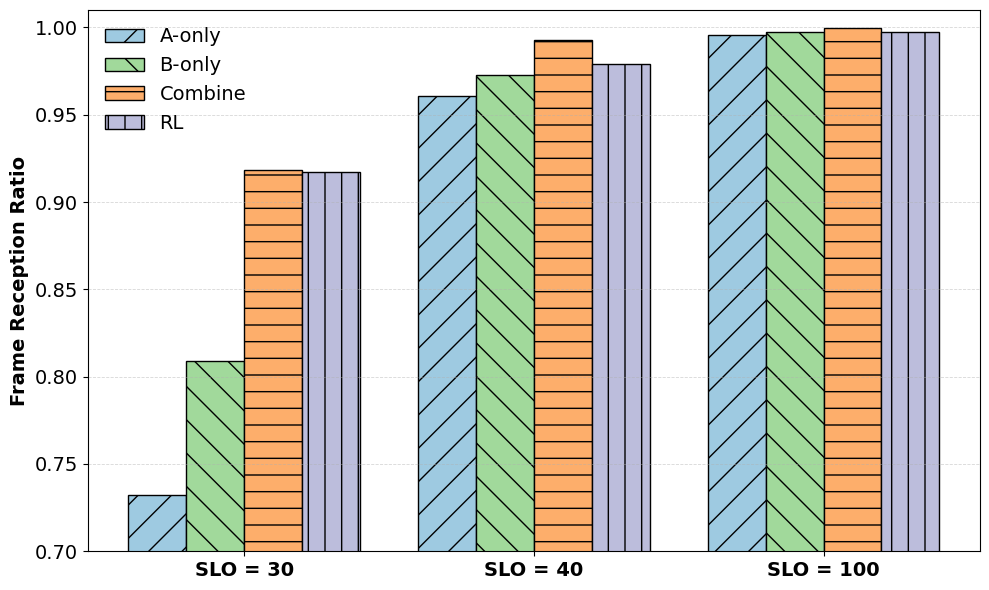

In [8]:
import matplotlib.pyplot as plt

# 데이터 정의
thresholds = [30, 40, 100]
methods = ['A-only', 'B-only', 'Combine', 'RL']
values = {
    30: [0.7321043811, 0.808893943,   0.9183026095, 0.9173449844],
    40: [0.9607972229, 0.9729470912,   0.9925784056, 0.9789920996],
    100: [0.9956906871, 0.9971271247,   0.9994613359, 0.9971271247]
}

# 설정
bar_width = 0.2
x = list(range(len(thresholds)))
offsets = [-1.5 * bar_width, -0.5 * bar_width, 0.5 * bar_width, 1.5 * bar_width]

# 색상은 만족한 soft tone 유지
colors = ['#9ecae1', '#a1d99b', '#fdae6b', '#bcbddc']
# 더 일반적인 해칭
hatches = ['/', '\\', '-', '|']

fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프
for i, method in enumerate(methods):
    heights = [values[th][i] for th in thresholds]
    ax.bar([xv + offsets[i] for xv in x], heights,
           width=bar_width,
           color=colors[i],
           edgecolor='black',
           hatch=hatches[i],
           label=method)

# 세로 격자
ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)

# 축 및 범례
ax.set_xticks(x)
ax.set_xticklabels([f"SLO = {t}" for t in thresholds], fontweight='bold', fontsize=14)
ax.set_ylabel("Frame Reception Ratio", fontweight='bold', fontsize=14)
ax.set_ylim(0.7, 1.01)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.legend(fontsize=14, loc='upper left', frameon=False)

# 저장 및 출력
plt.tight_layout()
plt.savefig('frame_reception_ratio.png', bbox_inches='tight')
plt.show()


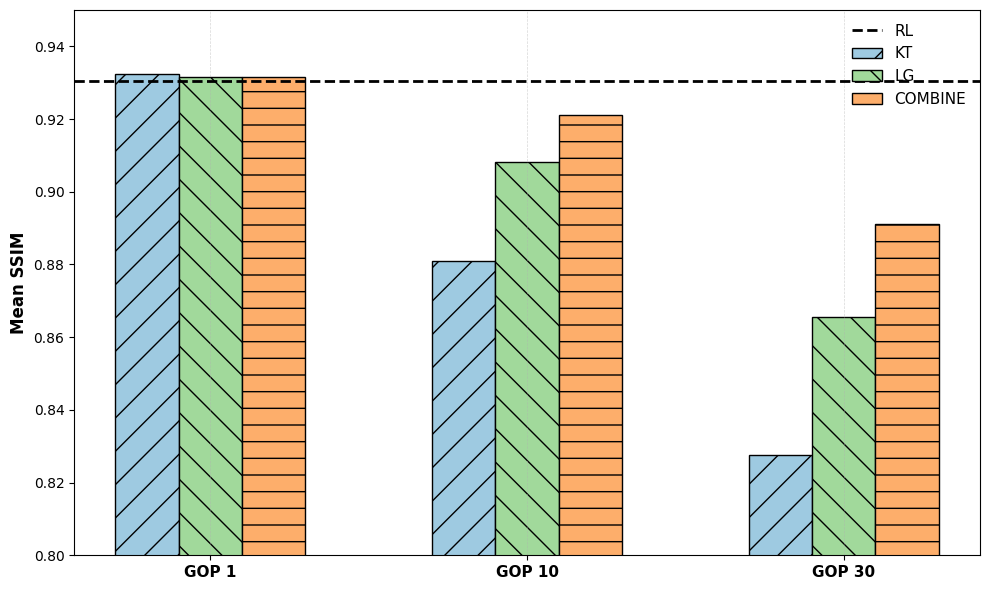

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# CSV 파일 경로
file_path = "ssim.csv"
df = pd.read_csv(file_path)

# RL 값 추출
rl_row = df[df['file'].str.contains("step_logs_1_1_30.csv")]
rl_value = rl_row['mean_ssim'].values[0] if not rl_row.empty else None

# threshold = 30인 row만 필터링
df_30 = df[df['file'].str.contains("threshold_30")]

# method, gop 추출 함수
def extract_info(row):
    match = re.search(r'raw_data_(\w+)_gop(\d+)_threshold_30\.csv', row['file'])
    if match:
        return pd.Series({
            'method': match.group(1).upper(),
            'gop': int(match.group(2)),
            'mean_ssim': row['mean_ssim']
        })
    return None

# 필요한 데이터만 추출
parsed_df = df_30.apply(extract_info, axis=1).dropna()

# 정렬
gop_values = sorted(parsed_df['gop'].unique())
methods = ['KT', 'LG', 'COMBINE']
colors = {'KT': '#9ecae1', 'LG': '#a1d99b', 'COMBINE': '#fdae6b'}
hatches = {'KT': '/', 'LG': '\\', 'COMBINE': '-'}

# 시각화 준비
bar_width = 0.2
x = np.arange(len(gop_values))
offsets = [-bar_width, 0, bar_width]

fig, ax = plt.subplots(figsize=(10, 6))

# 막대그래프 (KT, LG, Combine)
for i, method in enumerate(methods):
    method_data = parsed_df[parsed_df['method'] == method]
    y_values = [
        method_data[method_data['gop'] == g]['mean_ssim'].values[0]
        if not method_data[method_data['gop'] == g].empty else 0
        for g in gop_values
    ]
    ax.bar(x + offsets[i], y_values,
           width=bar_width,
           color=colors[method],
           edgecolor='black',
           hatch=hatches[method],
           label=method)

# RL 수평선 추가 (검정색 점선)
if rl_value is not None:
    ax.axhline(y=rl_value, color='black', linestyle='--', linewidth=2, label='RL')

# 그래프 설정
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_xticks(x)
ax.set_xticklabels([f"GOP {g}" for g in gop_values], fontweight='bold', fontsize=11)
ax.set_ylabel("Mean SSIM", fontweight='bold', fontsize=12)
ax.set_ylim(0.8, 0.95)
ax.legend(fontsize=11, frameon=False)

plt.tight_layout()
plt.savefig('ssim.png')
plt.show()


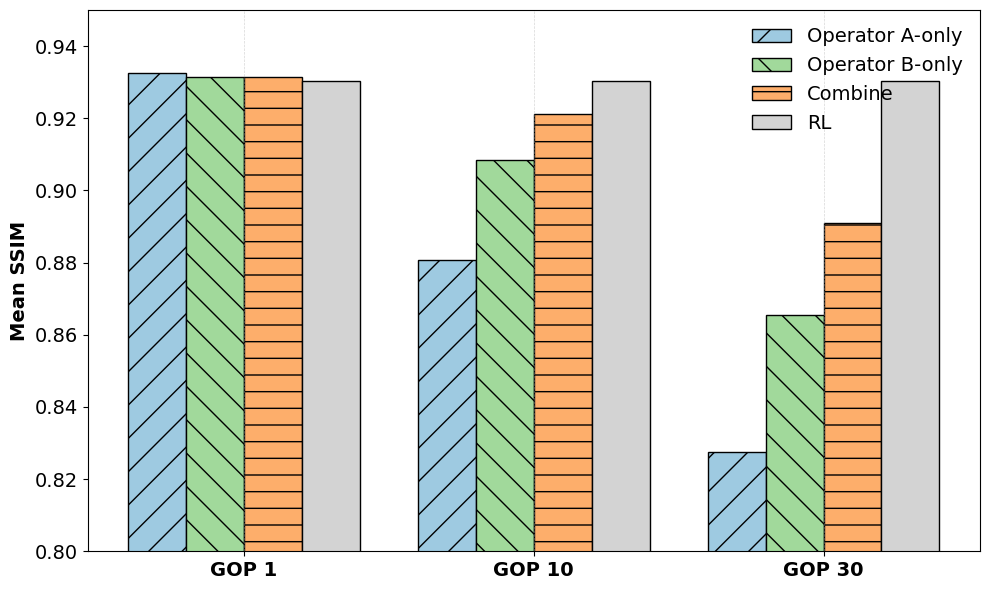

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# CSV 파일 경로
file_path = "ssim.csv"
df = pd.read_csv(file_path)

# RL 값 추출
rl_row = df[df['file'].str.contains("step_logs_1_1_30.csv")]
rl_value = rl_row['mean_ssim'].values[0] if not rl_row.empty else None

# threshold = 30인 row만 필터링
df_30 = df[df['file'].str.contains("threshold_30")]

# method, gop 추출 함수
def extract_info(row):
    match = re.search(r'raw_data_(\w+)_gop(\d+)_threshold_30\.csv', row['file'])
    if match:
        return pd.Series({
            'method': match.group(1).upper(),
            'gop': int(match.group(2)),
            'mean_ssim': row['mean_ssim']
        })
    return None

parsed_df = df_30.apply(extract_info, axis=1).dropna()

# 정렬
gop_values = sorted(parsed_df['gop'].unique())

# 이제 4개 메서드
methods = ['KT', 'LG', 'COMBINE', 'RL']
colors = {'KT': '#9ecae1', 'LG': '#a1d99b', 'COMBINE': '#fdae6b', 'RL': 'lightgray'}
hatches = {'KT': '/', 'LG': '\\', 'COMBINE': '-', 'RL': ''}

# 시각화 준비
bar_width = 0.2
x = np.arange(len(gop_values))

# offsets: KT, LG, COMBINE, RL 순서로 좌우로 배치
offsets = [-1.5*bar_width, -0.5*bar_width, 0.5*bar_width, 1.5*bar_width]

fig, ax = plt.subplots(figsize=(10, 6))
method_labels = {
    'KT': 'Operator A-only',
    'LG': 'Operator B-only',
    'COMBINE': 'Combine',
    'RL': 'RL'
}

for i, method in enumerate(methods):
    if method != 'RL':
        method_data = parsed_df[parsed_df['method'] == method]
        y_values = [
            method_data[method_data['gop'] == g]['mean_ssim'].values[0]
            if not method_data[method_data['gop'] == g].empty else 0
            for g in gop_values
        ]
    else:
        # RL은 모든 GOP에서 동일한 값
        y_values = [rl_value] * len(gop_values)

    ax.bar(
        x + offsets[i],
        y_values,
        width=bar_width,
        color=colors[method],
        edgecolor='black',
        hatch=hatches[method],
        label=method_labels[method]
    )

# 그래프 설정
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_xticks(x)
ax.set_xticklabels([f"GOP {g}" for g in gop_values],
                   fontweight='bold', fontsize=14)
ax.set_ylabel("Mean SSIM", fontweight='bold', fontsize=14)
ax.set_ylim(0.8, 0.95)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.legend(fontsize=14, frameon=False)

plt.tight_layout()
plt.savefig('ssim.png')
plt.show()


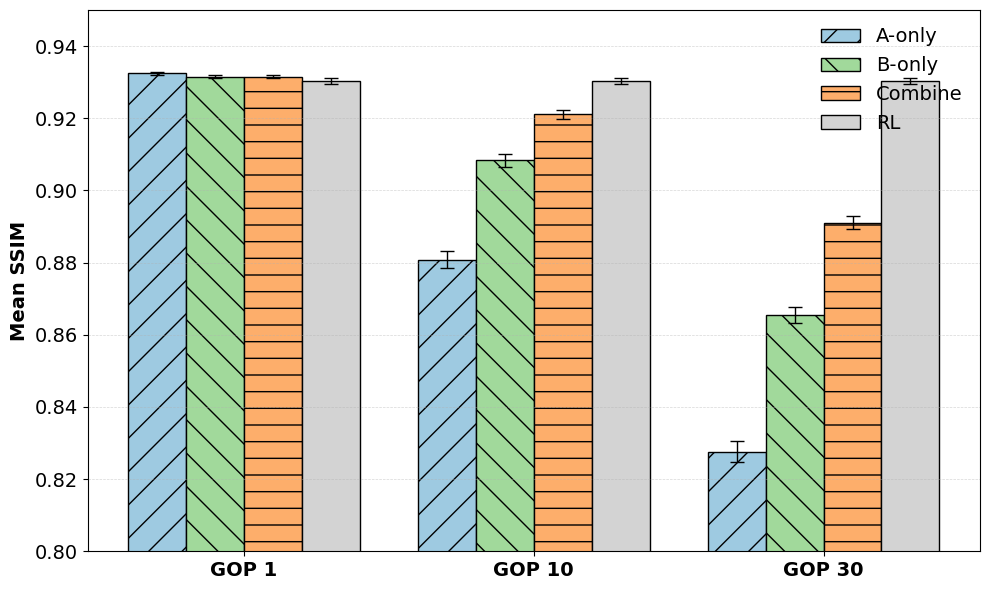

In [7]:
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

def compute_mean_ci(df, col, alpha=0.05):
    """
    0이 아닌 값들의 mean 과 95% (default) 신뢰구간 반폭(half-width)을 반환.
    """
    vals = df[col][df[col] != 0]
    n = len(vals)
    mean = vals.mean()
    sem = vals.std(ddof=1) / np.sqrt(n)
    dfree = n - 1
    t_crit = t.ppf(1 - alpha/2, dfree)    # 95% CI → 0.975 percentile
    half_width = sem * t_crit
    return mean, half_width

# 1) 파일 경로
rl_path = "/home/songmu/Downloads/step_logs_1_1.csv"
pattern = "/home/songmu/Downloads/raw_data_*_gop*_threshold_30.csv"

# 2) RL 통계: mean & 95% CI half-width
rl_df        = pd.read_csv(rl_path)
rl_mean, rl_ci = compute_mean_ci(rl_df, 'SSIM')

# 3) KT/LG/COMBINE 통계 계산
records = []
for fpath in glob.glob(pattern):
    fname = os.path.basename(fpath)
    m = re.match(r'raw_data_(\w+)_gop(\d+)_threshold_30\.csv', fname)
    if not m:
        continue
    method, gop = m.group(1).upper(), int(m.group(2))
    df = pd.read_csv(fpath)
    mean, ci = compute_mean_ci(df, 'ssim')
    records.append({'method': method, 'gop': gop, 'mean': mean, 'ci': ci})

# 4) DataFrame으로 정리하고 RL 레코드 추가
agg = pd.DataFrame(records)
rl_records = [
    {'method': 'RL', 'gop': g, 'mean': rl_mean, 'ci': rl_ci}
    for g in sorted(agg['gop'].unique())
]
agg = pd.concat([agg, pd.DataFrame(rl_records)], ignore_index=True)

# 5) 시각화 세팅
gops    = sorted(agg['gop'].unique())
methods = ['KT', 'LG', 'COMBINE', 'RL']
colors  = {'KT': '#9ecae1', 'LG': '#a1d99b', 'COMBINE': '#fdae6b', 'RL': 'lightgray'}
hatches = {'KT': '/', 'LG': '\\', 'COMBINE': '-', 'RL': ''}
labels  = {
    'KT': 'A-only',
    'LG': 'B-only',
    'COMBINE': 'Combine',
    'RL': 'RL'
}

bar_w   = 0.2
x       = np.arange(len(gops))
offsets = [-1.5*bar_w, -0.5*bar_w, 0.5*bar_w, 1.5*bar_w]

fig, ax = plt.subplots(figsize=(10, 6))

for i, m in enumerate(methods):
    sub   = agg[agg['method'] == m]
    means = [sub[sub['gop'] == g]['mean'].values[0] for g in gops]
    cis   = [sub[sub['gop'] == g]['ci'  ].values[0] for g in gops]
    ax.bar(
        x + offsets[i],
        means,
        width=bar_w,
        color=colors[m],
        edgecolor='black',
        hatch=hatches[m],
        label=labels[m],
        yerr=cis,         # 95% CI half-width
        capsize=5,
        error_kw={'linewidth': 1}
    )

# 6) 축, 범례, 저장
ax.set_xticks(x)
ax.set_xticklabels([f"GOP {g}" for g in gops],
                   fontweight='bold', fontsize=14)
ax.set_ylabel("Mean SSIM", fontweight='bold', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylim(0.8, 0.95)
# ax.grid(axis='x', linestyle='--', alpha=0.5)
# x축 그리드 끄기
ax.grid(False, axis='x')
# y축 점선 켜기
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

ax.legend(fontsize=14, frameon=False, loc = 'upper right')

plt.tight_layout()
plt.savefig('ssim.png')
plt.show()


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# 파일 경로
file_paths = {
    30: "cdf_data_threshold_30.csv",
    40: "cdf_data_threshold_40.csv",
    100: "cdf_data_threshold_100.csv"
}

# 색상 정의 (KT, LG, Combine 순서)
gop_colors = {
    1: '#9ecae1',   # KT
    10: '#a1d99b',  # LG
    30: '#fdae6b'   # Combine
}

# Label 파싱 함수
def parse_label(label):
    match = re.match(r'(combine|rl).*?(\d+)', label.lower())
    if match:
        method = match.group(1).upper()
        gop = int(match.group(2))
        return pd.Series([method, gop])
    return pd.Series([None, None])

# 그래프 그리기 및 저장
for threshold, path in file_paths.items():
    df = pd.read_csv(path)
    df[['method', 'gop']] = df['Label'].apply(parse_label)
    df = df.dropna()

    plt.figure(figsize=(9, 6))

    # Combine: GOP별 그래프
    for gop in sorted(df['gop'].unique()):
        combine_df = df[(df['method'] == 'COMBINE') & (df['gop'] == gop)]
        if not combine_df.empty:
            plt.plot(combine_df['FreezeDuration'], combine_df['CDF'],
                     label=f"Combine (GoP={int(gop)})",
                     color=gop_colors.get(gop, '#cccccc'),
                     linestyle='-', linewidth=2)

    # RL: 단일 점선 그래프
    rl_df = df[df['method'] == 'RL']
    if not rl_df.empty:
        plt.plot(rl_df['FreezeDuration'], rl_df['CDF'],
                 label="RL", color='black', linestyle='--', linewidth=2)

    # 축 및 스타일 설정
    plt.xlabel("Freeze Duration (frames)", fontsize=14, fontweight='bold')
    plt.ylabel("CDF", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=14)
    ax.tick_params(axis='y', labelsize=14)

    plt.tight_layout()

    # 저장
    plt.savefig(f"cdf_threshold_{threshold}.png", dpi=300, bbox_inches='tight')
    plt.close()


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# 파일 경로
file_paths = {
    30: "cdf_data_threshold_30.csv",
    40: "cdf_data_threshold_40.csv",
    100: "cdf_data_threshold_100.csv"
}

# 색상 정의 (KT, LG, Combine 순서)
gop_colors = {
    1: '#9ecae1',   # KT
    10: '#a1d99b',  # LG
    30: '#fdae6b'   # Combine
}

# Label 파싱 함수
def parse_label(label):
    match = re.match(r'(combine|rl).*?(\d+)', label.lower())
    if match:
        method = match.group(1).upper()
        gop = int(match.group(2))
        return pd.Series([method, gop])
    return pd.Series([None, None])

# 그래프 그리기 및 저장
for threshold, path in file_paths.items():
    df = pd.read_csv(path)
    df[['method', 'gop']] = df['Label'].apply(parse_label)
    df = df.dropna()

    plt.figure(figsize=(9, 6))

    # Combine: GOP별 그래프
    for gop in sorted(df['gop'].unique()):
        combine_df = df[(df['method'] == 'COMBINE') & (df['gop'] == gop)]
        if not combine_df.empty:
            plt.plot(
                combine_df['FreezeDuration'],
                combine_df['CDF'],
                label=f"Combine (GoP={gop})",
                color=gop_colors.get(gop, '#cccccc'),
                linestyle='-',
                linewidth=2,
                marker='o',        # ← 마커 추가
                markersize=5       # ← 마커 크기 조정
            )

    # RL: 단일 점선 그래프
    rl_df = df[df['method'] == 'RL']
    if not rl_df.empty:
        plt.plot(
            rl_df['FreezeDuration'],
            rl_df['CDF'],
            label="RL",
            color='black',
            linestyle='--',
            linewidth=2,
            marker='o',       # ← 사각형 마커 예시
            markersize=5      # ← 마커 크기
        )

    # 축 및 스타일 설정
    plt.xlabel("Freeze Duration (frames)", fontsize=14, fontweight='bold')
    plt.ylabel("CDF", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=14)
    ax = plt.gca()
    ax.tick_params(axis='both', labelsize=14)

    plt.tight_layout()
    plt.savefig(f"cdf_{threshold}.png", dpi=300, bbox_inches='tight')
    plt.close()


path, frame-type 개수 세기

In [2]:
import pandas as pd

# 파일 경로
file_paths = {
    "30ms": "30ms.csv",
    "40ms": "40ms.csv",
    "100ms": "100ms.csv"
}

# 결과를 저장할 딕셔너리
results = {}

for name, path in file_paths.items():
    df = pd.read_csv(path)
    
    # Action 비율 계산
    action_0_3 = df['Action'].isin([0, 1, 2, 3]).sum()
    action_4_5 = df['Action'].isin([4, 5]).sum()
    total_actions = action_0_3 + action_4_5
    action_ratio = {
        '0-3 비율': action_0_3 / total_actions if total_actions else 0,
        '4-5 비율': action_4_5 / total_actions if total_actions else 0
    }
    
    # Frame type 비율 계산
    frame_i = df['Frame type'].str.contains('I', na=False).sum()
    frame_p = df['Frame type'].str.contains('P', na=False).sum()
    total_frames = frame_i + frame_p
    frame_ratio = {
        'I-frame 비율': frame_i / total_frames if total_frames else 0,
        'P-frame 비율': frame_p / total_frames if total_frames else 0
    }
    
    results[name] = {
        'Action 비율': action_ratio,
        'Frame type 비율': frame_ratio
    }

# 결과 출력
for name, result in results.items():
    print(f"=== {name} ===")
    print("Action 비율:")
    for k, v in result['Action 비율'].items():
        print(f"  {k}: {v:.4f}")
    print("Frame type 비율:")
    for k, v in result['Frame type 비율'].items():
        print(f"  {k}: {v:.4f}")
    print()




=== 30ms ===
Action 비율:
  0-3 비율: 0.0472
  4-5 비율: 0.9528
Frame type 비율:
  I-frame 비율: 0.2432
  P-frame 비율: 0.7568

=== 40ms ===
Action 비율:
  0-3 비율: 0.8161
  4-5 비율: 0.1839
Frame type 비율:
  I-frame 비율: 0.0453
  P-frame 비율: 0.9547

=== 100ms ===
Action 비율:
  0-3 비율: 0.9862
  4-5 비율: 0.0138
Frame type 비율:
  I-frame 비율: 0.0362
  P-frame 비율: 0.9638



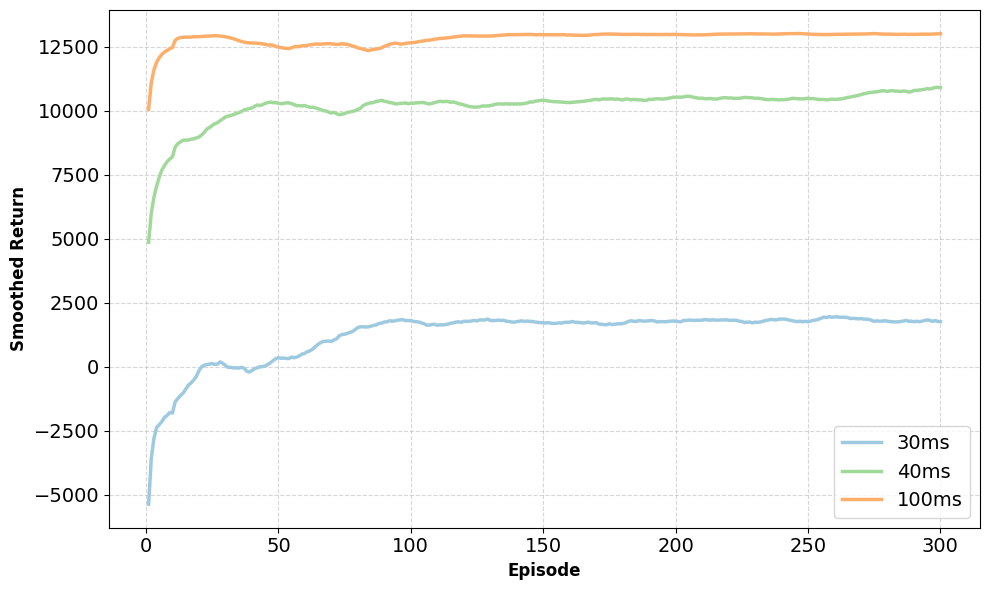

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로와 라벨
file_info = {
    "30ms": ("30ms_return.csv", '#9ecae1'),   # KT 스타일
    "40ms": ("40ms_return.csv", '#a1d99b'),   # LG 스타일
    "100ms": ("100ms_return.csv", '#fdae6b')  # Combine 스타일
}

# 그래프 초기화
plt.figure(figsize=(10, 6))

# 각 파일에 대해 rolling_mean 시각화
for label, (path, color) in file_info.items():
    df = pd.read_csv(path)
    plt.plot(df['Episode'], df['rolling_mean'], label=label, color=color, linewidth=2.5)

# 축, 범례 등 스타일 설정
plt.xlabel("Episode", fontsize=12, fontweight='bold')
plt.ylabel("Smoothed Return", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.savefig('average_reutrn.png')
plt.show()


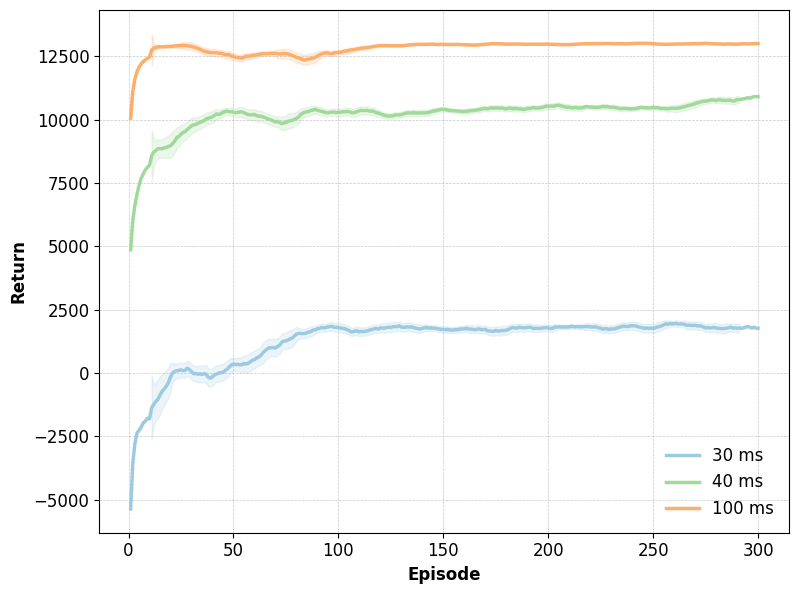

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 및 컬러 정보
file_info = {
    "30 ms": ("30ms_return.csv", '#9ecae1'),
    "40 ms": ("40ms_return.csv", '#a1d99b'),
    "100 ms": ("100ms_return.csv", '#fdae6b')
}

plt.figure(figsize=(8, 6))

# smoothing window 크기 (rolling_mean과 동일하게 설정)
window_size = 20

for label, (fname, color) in file_info.items():
    df = pd.read_csv(f"{fname}")
    episodes = df['Episode'].to_numpy()
    smoothed = df['rolling_mean'].to_numpy()
    raw = df['mean']
    
    # raw return의 rolling std 계산
    rolling_std = raw.rolling(window=window_size, center=True).std().to_numpy()
    
    # 1) 표준편차 구간 배경으로 그리기 (numpy array 사용)
    plt.fill_between(
        episodes,
        smoothed - rolling_std,
        smoothed + rolling_std,
        color=color,
        alpha=0.2,
        zorder=1
    )
    
    # 2) smoothing 곡선을 굵게 그리기
    plt.plot(
        episodes,
        smoothed,
        color=color,
        linewidth=2.5,
        label=label,
        zorder=2
    )

# 레이블 및 스타일
plt.xlabel('Episode', fontweight='bold', fontsize=12)
plt.ylabel('Return', fontweight='bold', fontsize=12)
# plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
# ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.legend(fontsize=12, frameon=False)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)

plt.savefig('average_reutrn.png')
plt.show()


In [29]:
import pandas as pd
import numpy as np
from scipy import stats

# 1. CSV 파일 읽기
df = pd.read_csv('/home/songmu/multipath/server/logs/2025_02_17_13_57/baseline/raw_data_combine_gop30_threshold_100.csv')  # 경로를 실제 파일 위치로 수정하세요

# 2. SSIM이 0이 아닌 행만 필터링
ssim_vals = df['ssim']
ssim_nonzero = ssim_vals[ssim_vals != 0]

# 3. 표본 수, 평균, 표준오차(SEM) 계산
n = len(ssim_nonzero)
mean_ssim = ssim_nonzero.mean()
sem_ssim = ssim_nonzero.std(ddof=1) / np.sqrt(n)

# 4. t-분포를 이용한 95% 신뢰구간 반폭 계산
alpha = 0.05
dfree = n - 1
t_crit = stats.t.ppf(1 - alpha/2, df=dfree)
ci_half_width = sem_ssim * t_crit

# 5. 결과 출력
print(f"SSIM (n={n}):")
print(f"  Mean = {mean_ssim:.4f}")
print(f"  95% CI half-width = {ci_half_width:.4f}")
print(f"  95% CI = [{mean_ssim - ci_half_width:.4f}, {mean_ssim + ci_half_width:.4f}]")

SSIM (n=16687):
  Mean = 0.9433
  95% CI half-width = 0.0004
  95% CI = [0.9429, 0.9436]
